In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression as LR

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import os

In [6]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = poly_dataframe['power_1'].map(lambda x:x**power)
    return poly_dataframe

In [7]:
#Read the data
sales = pd.read_csv('kc_house_data.csv')

In [8]:
#Sort the data frame by 'sqft_living' and 'price'
sales = sales.sort_values(by = ['sqft_living', 'price'])

In [9]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


### Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’.

In [10]:
#Calling the function in order to create a polynomial of the required degree
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)

In [11]:
class Regression():
    
    def __init__(self):
        pass

    def get_df_coeff(self, var, model):
        features_coeff = pd.DataFrame({'Variables':var, 'Coefficients': model.coef_},
                                  columns = ['Variables', 'Coefficients'])
        print(features_coeff)
    
    def evaluate(self, actual, predicted):
        #print("RSS:- {}\n" .format(np.sum(np.array([(a-p)**2 for a,p in zip(list(poly_n_data['price']), list(predicted_price))]))))
        RSS = np.sum(np.array([(a-p)**2 for a,p in zip(actual, predicted)]))
        
        return (RSS)
    
    #Modelling on the required degree polynomial
    def modelling(self, degree, data=sales, rss=0):   
        #Calling the function in order to create a polynomial of the required degree
        poly_n_data = polynomial_dataframe(data['sqft_living'], degree)
        independent_variables = list(poly_n_data.columns)
    
        #Add sales['price'] to poly_n_data
        poly_n_data['price'] = sales['price']
    
        #Fit Linear Regression Model on independent variables
        lr = LR()
        model_n =  lr.fit(poly_n_data[independent_variables], poly_n_data['price'])    
    
        #Predict the target with polynomial of degree n
        predicted_price = model_n.predict(poly_n_data[independent_variables])
        plt.plot(poly_n_data['power_1'], poly_n_data['price'], '.',
             poly_n_data['power_1'], predicted_price, '-')
        actual, predicted = list(map(lambda x:np.array(x).ravel(), [poly_n_data['price'], predicted_price]))
        rss_error = self.evaluate(actual, predicted)
        if(rss!=0):
            #Error
            return (rss_error)
        else:
            #Error
            print("RSS:- {}" .format(rss_error))
            
        #Return the independent variables and the model
        return (independent_variables, model_n)

### Add sales[‘price’] to poly1_data as this will be our output variable.

In [12]:
poly1_data['price'] = sales['price']

## Fit Linear Regression Model

In [13]:
lr = LR()
model1 =  lr.fit(np.array(poly1_data['power_1']).reshape(-1,1), poly1_data['price'])

### 7. Next, produce a scatter plot of the training data (just square feet vs price) and add the fitted model.

In [14]:
predicted_price = model1.predict(np.array(poly1_data['power_1']).reshape(-1,1))

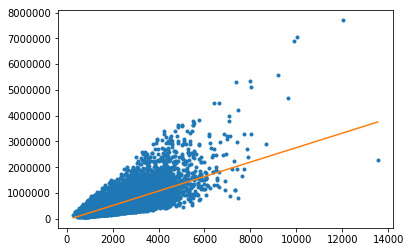

In [15]:
plt.plot(poly1_data['power_1'], poly1_data['price'], '.',
         poly1_data['power_1'], predicted_price, '-')

###  Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

### Second Degree Polynomial

RSS:- 1361080473438602.5


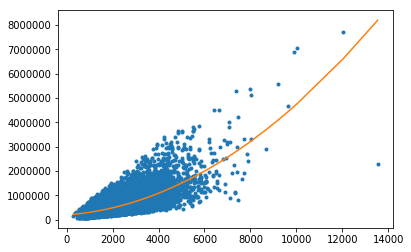

In [16]:
#Create a Modelling Object
mod = Regression()
ind_var, model = mod.modelling(2)

In [17]:
#Obtain the coefficients for Model
mod.get_df_coeff(ind_var, model)
#polynomial_dataframe(feature, 2)

  Variables  Coefficients
0   power_1     67.994095
1   power_2      0.038581


### Third Degree Polynomial

RSS:- 1342841370414958.0


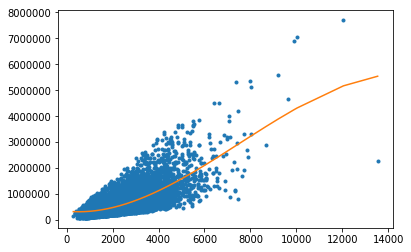

In [18]:
ind_var_3, model_3 = mod.modelling(3)

In [19]:
#Obtain the coefficients for Model
mod.get_df_coeff(ind_var_3, model_3)

  Variables  Coefficients
0   power_1    -90.181986
1   power_2      0.087047
2   power_3     -0.000004


###  Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

RSS:- 2648217033837416.5


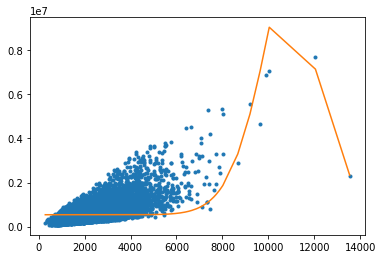

In [20]:
#Fifteenth Degree Polynomial
ind_var_15, model_15 = mod.modelling(15)

In [21]:
#Obtain the coefficients for Model
mod.get_df_coeff(ind_var_15, model_15)

   Variables  Coefficients
0    power_1  4.564042e-91
1    power_2  6.917119e-51
2    power_3  2.577383e-56
3    power_4  2.781979e-88
4    power_5  1.198639e-74
5    power_6  2.685755e-71
6    power_7  2.261476e-67
7    power_8  1.859003e-63
8    power_9  1.471441e-59
9   power_10  1.097710e-55
10  power_11  7.435090e-52
11  power_12  4.230156e-48
12  power_13  1.616186e-44
13  power_14 -2.492838e-48
14  power_15  9.597183e-53


### 11. Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

RSS:- 775170954723239.1


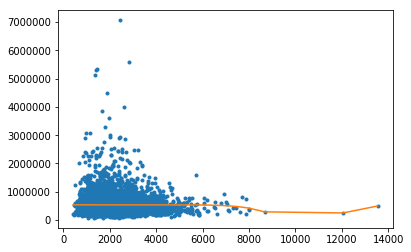

In [22]:
#Set 1
set_1 = pd.read_csv(os.getcwd() + "/set_1_data.csv/set_1_data.csv")
ind_var_set1_15, model_set1_15 = mod.modelling(15, set_1)

RSS:- 774620060361783.2


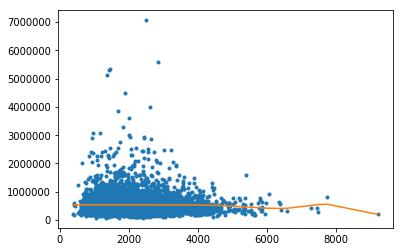

In [23]:
#Set 2
set_2 = pd.read_csv(os.getcwd() + "/set_2_data.csv/set_2_data.csv")
ind_var_set2_15, model_set2_15 = mod.modelling(15, set_2)

RSS:- 775246015753883.8


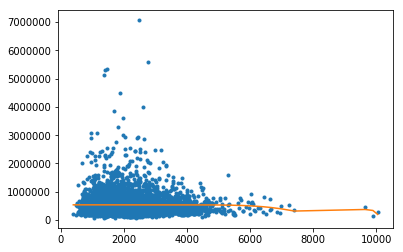

In [24]:
#Set 3
set_3 = pd.read_csv(os.getcwd() + "/set_3_data.csv/set_3_data.csv")
ind_var_set3_15, model_set3_15 = mod.modelling(15, set_3)

RSS:- 774657347876002.9


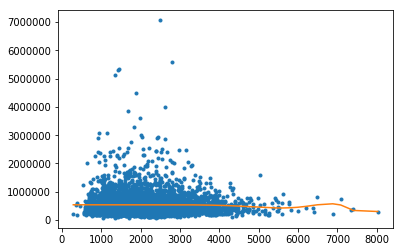

In [25]:
#Set 4
set_4 = pd.read_csv(os.getcwd() + "/set_4_data.csv/set_4_data.csv")
ind_var_set4_15, model_set4_15 = mod.modelling(15, set_4)

In [26]:
print("Set_1:-{}\nSet_2:-{}\nSet_3:-{}\nSet_4:-{}" .format(set_1.shape, set_2.shape, set_3.shape, set_4.shape))

Set_1:-(5404, 21)
Set_2:-(5398, 21)
Set_3:-(5409, 21)
Set_4:-(5402, 21)


### 12. Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?

In [27]:
'No'

'No'

### 13. Quiz Question: True/False the plotted fitted lines look the same in all four plots

In [28]:
False

False

### 14. Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree.

In [29]:
#Training, Validation and Test data
training_data = pd.read_csv(os.getcwd() + "/train_data.csv/train_data.csv")
test_data = pd.read_csv(os.getcwd() + "/test_data.csv/test_data.csv")
validation_data = pd.read_csv(os.getcwd() + "/valid_data.csv/valid_data.csv")

In [30]:
validation_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
5,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
6,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
7,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
8,1875500060,20140731T000000,395000.0,3,2.00,1890,14040,2.0,0,0,...,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018
9,7983200060,20150424T000000,230000.0,3,1.00,1250,9774,1.0,0,0,...,7,1250,0,1969,0,98003,47.3343,-122.306,1280,8850


### 15. Now for each degree from 1 to 15:

from IPython.display import Latex
Latex(r"""\begin{itemize}
\item Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree.//
\item Add training_data[‘price’] as a column to your polynomial data set.//
\item Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree.//
\item Compute the RSS on VALIDATION for the current model (print or save the RSS)
\end{itemize}""")

In [31]:
import sys
sys.float_info.max

1.7976931348623157e+308

### Learn the Model on Training Data

### 16. Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?

In [32]:
#Fit the model on training data
#Predict on Validation data
m = sys.float_info.max

def find_min_util(errors_list):
    min_rss = m
    ind = 0
    for i in range(len(errors_list)):
        if(errors_list[i]<min_rss):
            ind = (i+1)
            min_rss = errors_list[i]
    return (min_rss, ind)

def find_min_RSS_degree(data):    
    errors_list = []

    #Create an object 
    reg = Regression()
    for degree in range(1,16):
        print("Degree of the Polynomial:-" + str(degree))
        #Set the final parameter as non-zero
        indep_var, model = reg.modelling(degree,data)
        poly_n_validation = polynomial_dataframe(validation_data['sqft_living'], degree)
        
        #predict the output on validation data
        predicted_value = model.predict(poly_n_validation[indep_var])
        #error = reg.evaluate(validation_data['price'], predicted_value.ravel())
        error = np.array(validation_data['price']) - predicted_value
        error = np.sum(error**2)
        errors_list.append(error)
        
    #Get the minimum error degree
    print(errors_list)
    print(min(errors_list))
    #min_rss, min_degree = find_min_util(errors_list)
    #return (min_rss, min_degree)

Degree of the Polynomial:-1
RSS:- 1401119987437103.0
Degree of the Polynomial:-2
RSS:- 1401091776573718.8
Degree of the Polynomial:-3
RSS:- 1401091722546419.5
Degree of the Polynomial:-4
RSS:- 1401056764670304.2
Degree of the Polynomial:-5
RSS:- 1401078733141073.0
Degree of the Polynomial:-6
RSS:- 1401083462894430.2
Degree of the Polynomial:-7
RSS:- 1401077515961016.5
Degree of the Polynomial:-8
RSS:- 1401063439598946.0
Degree of the Polynomial:-9
RSS:- 1401045656279967.5
Degree of the Polynomial:-10
RSS:- 1401031168984034.5
Degree of the Polynomial:-11
RSS:- 1401023091623600.0
Degree of the Polynomial:-12
RSS:- 1401020360240795.8
Degree of the Polynomial:-13
RSS:- 1401024419286373.0
Degree of the Polynomial:-14
RSS:- 1401022391971412.0
Degree of the Polynomial:-15
RSS:- 1401021641742058.0
[1227217221735320.0, 1229662869846158.5, 1229668182914530.0, 1229895545249926.5, 1229872704704437.2, 1230350295903570.8, 1231926601183761.8, 1239969858190964.5, 1270722447701202.5, 1370469627673391.5

[None]

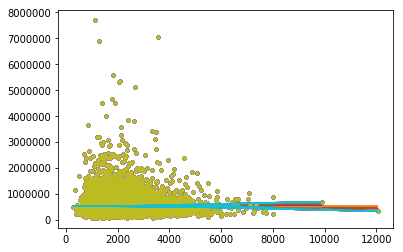

In [33]:
list(map(find_min_RSS_degree, [training_data]))

### What is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)

RSS:- 1401077515961016.5


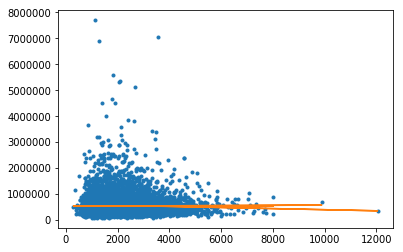

In [34]:
#Use the model for degree 1 on training data
reg = Regression()
ind_var_test_7, model_var_7 = reg.modelling(7, training_data)

In [35]:
1401077515961016.5 < 1401119987437103.0

True

RSS:- 1401119987437103.0


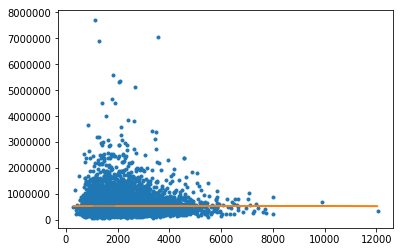

In [36]:
#Use the model for degree 1 on training data
reg = Regression()
ind_var_test_1, model_var_1 = reg.modelling(1, training_data)


In [37]:
poly_n_test = polynomial_dataframe(test_data['sqft_living'], 7)
predicted_test = model_var_7.predict(poly_n_test[ind_var_test_7])

In [38]:
#Calculate the error
np.sum((predicted_test-test_data['price'])**2)

285997669392610.56

Degree of the Polynomial:-1
RSS:- 1401119987437103.0
Degree of the Polynomial:-2
RSS:- 1401091776573718.8
Degree of the Polynomial:-3
RSS:- 1401091722546419.5
Degree of the Polynomial:-4
RSS:- 1401056764670304.2
Degree of the Polynomial:-5
RSS:- 1401078733141073.0
Degree of the Polynomial:-6
RSS:- 1401083462894430.2
Degree of the Polynomial:-7
RSS:- 1401077515961016.5
Degree of the Polynomial:-8
RSS:- 1401063439598946.0
Degree of the Polynomial:-9
RSS:- 1401045656279967.5
Degree of the Polynomial:-10
RSS:- 1401031168984034.5
Degree of the Polynomial:-11
RSS:- 1401023091623600.0
Degree of the Polynomial:-12
RSS:- 1401020360240795.8
Degree of the Polynomial:-13
RSS:- 1401024419286373.0
Degree of the Polynomial:-14
RSS:- 1401022391971412.0
Degree of the Polynomial:-15
RSS:- 1401021641742058.0
[1227217221735320.0, 1229662869846158.5, 1229668182914530.0, 1229895545249926.5, 1229872704704437.2, 1230350295903570.8, 1231926601183761.8, 1239969858190964.5, 1270722447701202.5, 1370469627673391.5

[None]

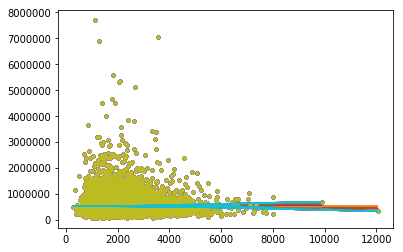

In [39]:
list(map(find_min_RSS_degree, [training_data]))

318843021958204.6

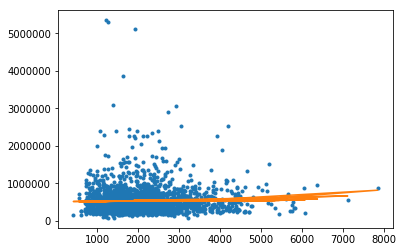

In [40]:
#Model the 4th degree polynomial on test data
reg = Regression()
reg.modelling(4, test_data, 1)

Degree of the Polynomial:-1
RSS:- 1401119987437103.0
Degree of the Polynomial:-2
RSS:- 1401091776573718.8
Degree of the Polynomial:-3
RSS:- 1401091722546419.5
Degree of the Polynomial:-4
RSS:- 1401056764670304.2
Degree of the Polynomial:-5
RSS:- 1401078733141073.0
Degree of the Polynomial:-6
RSS:- 1401083462894430.2
Degree of the Polynomial:-7
RSS:- 1401077515961016.5
Degree of the Polynomial:-8
RSS:- 1401063439598946.0
Degree of the Polynomial:-9
RSS:- 1401045656279967.5
Degree of the Polynomial:-10
RSS:- 1401031168984034.5
Degree of the Polynomial:-11
RSS:- 1401023091623600.0
Degree of the Polynomial:-12
RSS:- 1401020360240795.8
Degree of the Polynomial:-13
RSS:- 1401024419286373.0
Degree of the Polynomial:-14
RSS:- 1401022391971412.0
Degree of the Polynomial:-15
RSS:- 1401021641742058.0
[1227217221735320.0, 1229662869846158.5, 1229668182914530.0, 1229895545249926.5, 1229872704704437.2, 1230350295903570.8, 1231926601183761.8, 1239969858190964.5, 1270722447701202.5, 1370469627673391.5

[None, None, None]

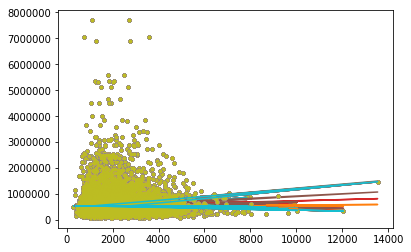

In [44]:
#Apply the function to each set
list(map(find_min_RSS_degree, [training_data, test_data, validation_data]))